# EDA (Exploaratory Data Analysis)

1. load Datasets

2. Clean data(Missing values , Duplicate ,Types)

3.  Treatment of Outliers 

4. Univariate & Bivariate  and Multivariate analysis .

5. Insights for each and every step.



### Outlier- A data point that is significantly different from other observations in a dataset. 



### How outliers will come---?

1. Measurement errors.

2. Data entry mistakes.


### why they are important---?

1. They can be errors.

2. They effect the data analysis.


### How to identify the outliers---?

1. Statistical Methods

--- > IQR(Inter quartile Range)

--- > Z-Score

2. Visualization techniques.

---> Boxplot 

---> Scatter plot

---> Histogram 

### Univariate Analysis - A method that analysis a single variable to describe its charateristics and finding patterns and summarizing the data.
#### It involves only one variable. 

----------------------------------------------------------------------

### Bivariate Analysis - It will give the relationship between two variables. It helps to discover or to find if there is an co-relation between the two variables and any association or any connection between the two variables.
#### It involves two variables (x & y)

----------------------------------------------------------------------

### Multivariate Analysis - To Unerstand how multiple factors interact and influence each other .  
#### It involves more than two variables.
### Example:
#### How our age,income and education infulence the purchasing Behaviour. 


# ETL

# ELT

## EDA : < Dataset >

1. Load & Overview 

2. Clean the Dataset (Missing , dupes, dtypes )

3. Uni , Bi & Multi analysis 

4. Outlier - IQR

5. Feature Enginnering

6. Key Insights




### Feature Engineering - "It is the process of turning raw data into useful features " that helps to improve the performance of machine learning models.

# 1. load libraries & datasets 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df= sns.load_dataset("titanic")

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
print("Shape of dataset",df.shape)
print("data info : ")

print(df.info())

# Summary 

print(df.describe())



Shape of dataset (891, 15)
data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass     

In [10]:
# Missing values analysis 

missing = pd.DataFrame({
    'misiing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100
})

missing.sort_values('missing_percentage', ascending=False)

,misiing_count,missing_percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [15]:
# Handling missing values

# Fill the numeric missing values with the mean

df['age'] = df['age'].fillna(df['age'].mean())

# Fill categorical missing values with mode

df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

#DROP 'deck' column (too many missing values)



print("Missing values after handling/cleaning : ",df.isnull().sum().sum())



Missing values after handling/cleaning :  2


In [16]:
# Missing values analysis 

missing = pd.DataFrame({
    'misiing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100
})

missing.sort_values('missing_percentage', ascending=False)

,misiing_count,missing_percentage
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


### Insights : We filled important columns and removed highly missing ones.

#### this keeps maximum while making the making dataset clean  

In [19]:
# Duplicates and Data type check 

print("Duplicate values : ",df.duplicated().sum())


# convert to category type

df['sex'] = df['sex'].astype('category')
df['class'] = df['class'].astype('category')

df['embarked'] = df['embarked'].astype('category')
df['embark_town'] = df['embark_town'].astype('category')

df.info()

Duplicate values :  111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    category
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(2)
memory usage: 61.5+ KB


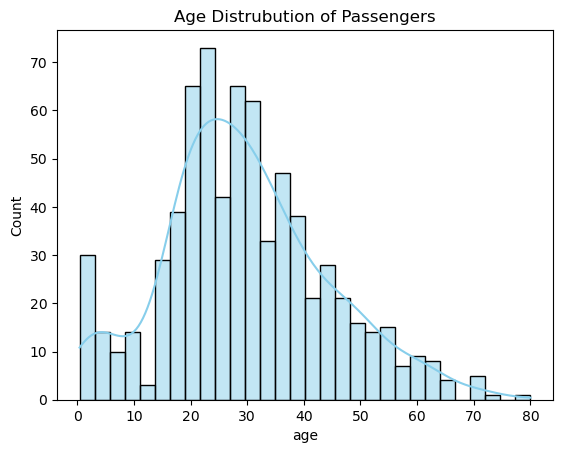

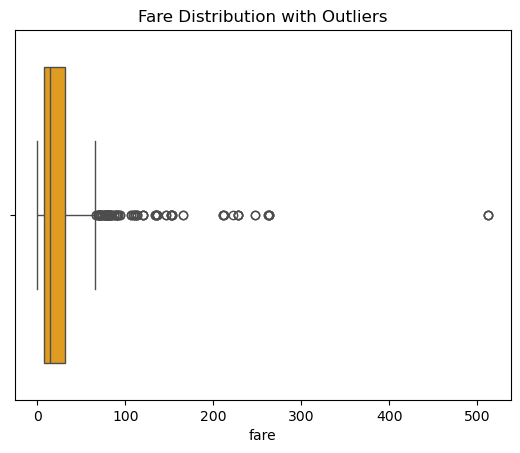

In [4]:
# 6. Univariate analysis - Numerical Features

num_cols = df.select_dtypes(include = ['float64', 'int64']).columns
df[num_cols].describe()

#Histogram : Age
sns.histplot(df['age'], bins=30, kde = True, color = 'skyblue')
plt.title("Age Distrubution of Passengers")
plt.show()

# Boxplot : Fare
sns.boxplot(x=df['fare'],color = 'orange')
plt.title("Fare Distribution with Outliers")
plt.show()

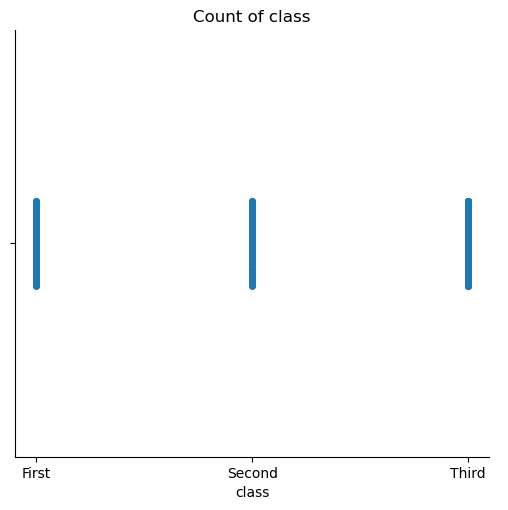

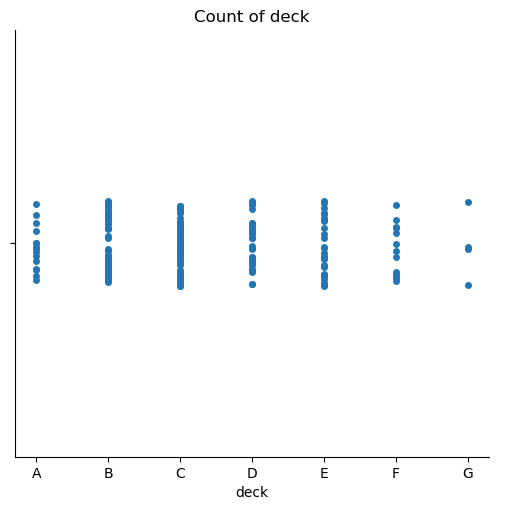

In [7]:
# Univariate Analysis - Categorical Features

cat_cols = df.select_dtypes(include = ['category']).columns
for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of {col}")
    plt.show()

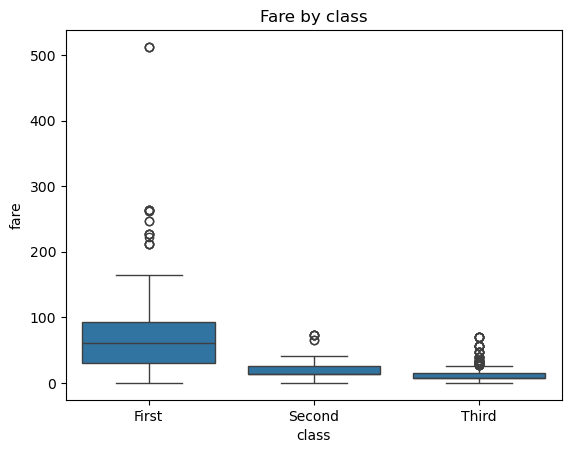

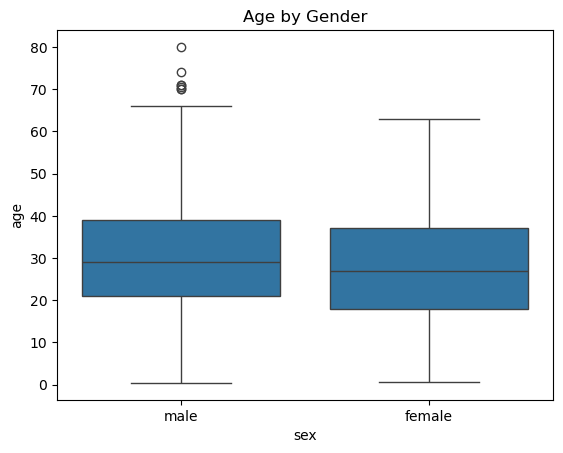

In [8]:
# Bivariate Analysis 

sns.boxplot(x='class', y='fare', data = df)
plt.title("Fare by class")
plt.show()

sns.boxplot(x='sex', y='age', data = df)
plt.title("Age by Gender")
plt.show()

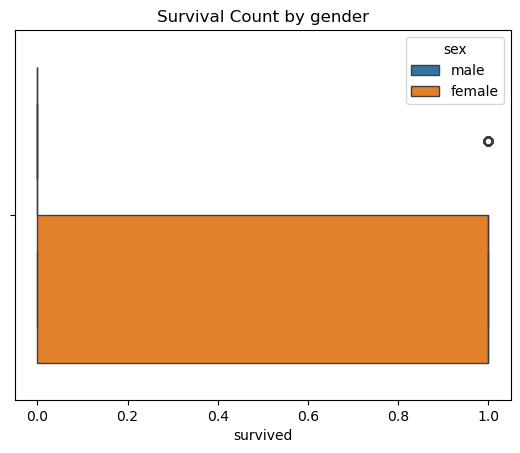

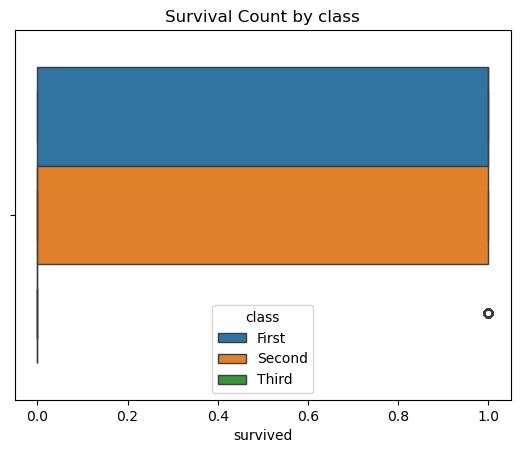

In [9]:
# Bivariate Analysis - Categorical vs Categorical

sns.boxplot(x = 'survived', hue = 'sex', data = df)
plt.title("Survival Count by gender")
plt.show()

sns.boxplot(x = 'survived', hue = 'class', data = df)
plt.title("Survival Count by class")
plt.show()

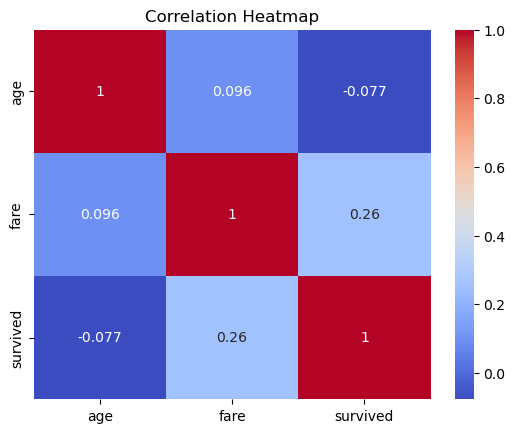

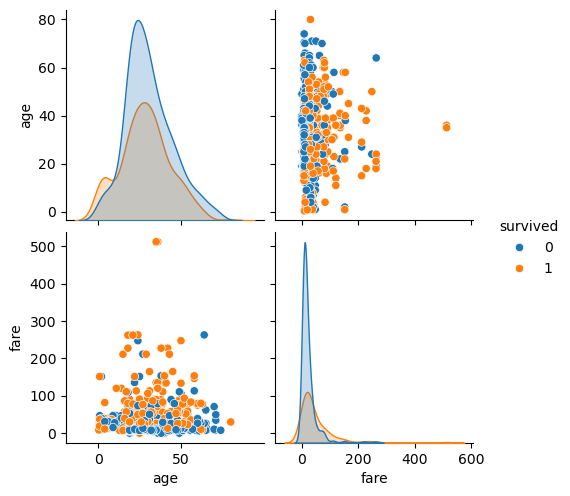

In [15]:
# Corelation and multivariate analysis

corr=df[['age','fare','survived']].corr()
sns.heatmap(corr, annot = True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

# Insights:
1. Fare has a positive correlation with survival

2. Age shows a slight negative correlation with survival



Number of outliers: 118


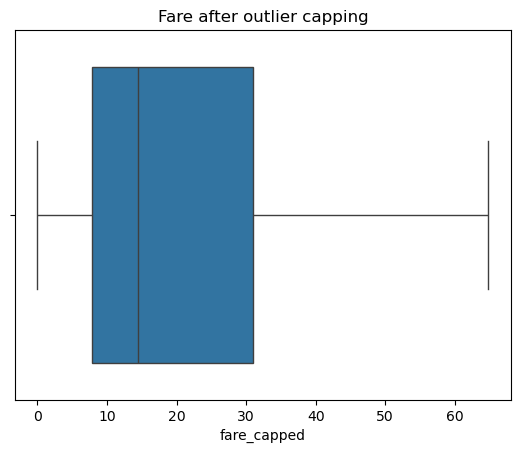

In [20]:
# Outlier Detection using IQR

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers=df[(df['age'] < lower_bound) | (df['fare']> upper_bound)]
print("Number of outliers:",len(outliers))
#Outliers 
df['fare_capped']=df['fare'].clip(lower_bound,upper_bound)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()

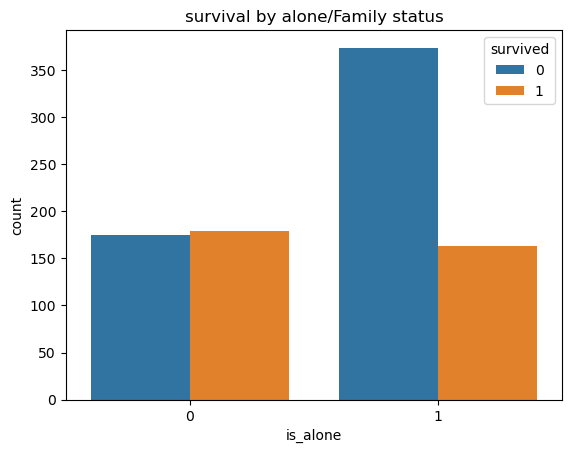

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [21]:
# Features Enginering

# create new Features

df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)

sns.countplot(x = 'is_alone', hue = 'survived', data=df)
plt.title('survival by alone/Family status')
plt.show()

df[['family_size', 'is_alone', 'survived']].head()

In [22]:
# export the cleaned data
df.to_csv("Titanic cleaned.csv", index = False)
print("\n Cleaned Titanic data saved as titanic_ckeaned.csv")


 Cleaned Titanic data saved as titanic_ckeaned.csv
